In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
big_alphabet = np.load("./data/big-alphabet_29x29_train-test-cv.npz")
big_alphabet.keys()

['test', 'train', 'cv']

In [4]:
from src.misc import transform_data

In [29]:
train_data = transform_data(big_alphabet["train"], norm=False)
cv_data = transform_data(big_alphabet["cv"], norm=False)
test_data = transform_data(big_alphabet["test"], norm=False)

In [33]:
train_x, train_y = zip(*train_data)
encoder_train_data = zip(train_x, train_x)

In [34]:
cv_x, cv_y = zip(*cv_data)
encoder_cv_data = zip(cv_x, cv_x)

In [35]:
test_x, test_y = zip(*test_data)

In [9]:
from src.NNMiniBatch import NNMiniBatch

In [10]:
from src.functions.activation_objs import IdentyFunc, TanhFunc, LogisticFunc, SoftmaxFunc, ReLuFunc
from src.functions.cost_objs import QuadraticCost, CrossEntropyCost, MulticlassCrossEntropyCost

In [11]:
sizes = [841, 100, 841]
activation_functions = [LogisticFunc, IdentyFunc]
cost_function = QuadraticCost

In [11]:
# Online

In [65]:
nn = NNMiniBatch(sizes = sizes,
                 activation_functions = activation_functions,
                 cost_function = cost_function,
                 epochs = 600,
                 eta = 0.04,
                 betta = 0.01,
                 mini_batch_size = None,
                 mode = "online",
                 stop_rate=0)

w_sizes [(100, 841), (841, 100)]
b_sizes [(1, 100), (1, 841)]


In [66]:
scores_diff, scores = nn.sgd(encoder_train_data, encoder_cv_data);

Epoch 599: 0 / 52 | 0.0221268649218 | 0.00124520567134

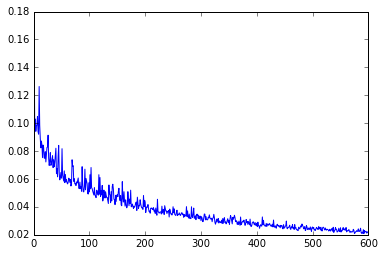

In [67]:
plt.plot(range(len(scores)), scores);

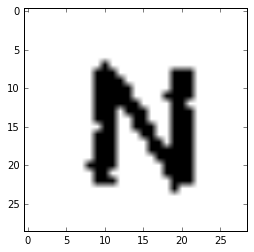

In [68]:
plt.imshow(x[10].reshape((29,29)), cmap="gray")

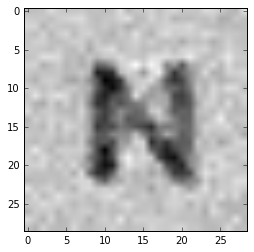

In [69]:
x_pred = nn.feedforward(x[10])
plt.imshow(x_pred.reshape((29,29)), cmap="gray")

In [ ]:
x_test, y_test = zip(*test_data)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
y_pred = np.argmax(nn.feedforward(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

In [ ]:
np.sum(y_pred == y_true), len(y_true)

In [12]:
# batch

In [36]:
sizes = [841, 26, 841]
activation_functions = [LogisticFunc, IdentyFunc]
cost_function = QuadraticCost

In [37]:
nn = NNMiniBatch(sizes = sizes,
                 activation_functions = activation_functions,
                 cost_function = cost_function,
                 epochs = 2000,
                 eta = 0.02,
                 lyamda = 10.2,
                 betta = 0.6,
                 mini_batch_size = None,
                 mode = "batch",
                 stop_rate=-1)

w_sizes [(26, 841), (841, 26)]
b_sizes [(1, 26), (1, 841)]


In [38]:
scores_diff, scores = nn.sgd(encoder_train_data, encoder_cv_data);

Epoch 1999: 0 / 52 | 10.0523585418 | 0.000776435779341

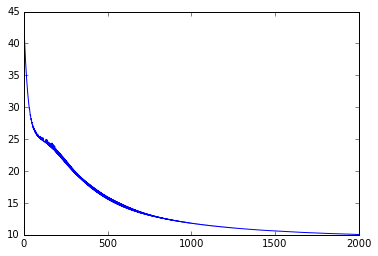

In [39]:
plt.plot(range(len(scores)), scores);

# Draw Activations Plot

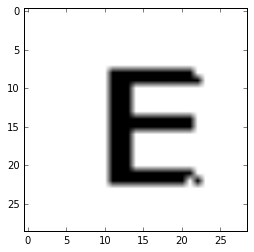

In [48]:
s = train_x[126]
plt.imshow(s.reshape((29, 29)), cmap="gray")

In [50]:
import matplotlib.gridspec as gridspec

In [52]:
len(train_x), len(cv_x), len(test_x)

(156, 52, 51)

In [57]:
data_x = np.r_[train_x, cv_x, test_x]

In [66]:
data_x.shape

(259, 841)

In [69]:
data_y_bin = np.r_[train_y, cv_y, test_y]

In [70]:
data_y.shape

(259, 26)

In [71]:
data_y = np.argmax(data_y_bin, axis=1)

In [73]:
data_y

array([ 0,  1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23,
       24, 25,  3,  4,  5,  6,  7,  8,  9,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19,
       19,  2,  2,  2,  2,  2, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25,
       25, 25,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  0,  0,  1,  1, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14,
       15, 15, 16, 16, 17, 17, 18, 18, 19, 19,  2,  2, 20, 20, 21, 21, 22,
       22, 23, 23, 24, 24, 25, 25,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,
        8,  8,  9,  9,  0,  0,  1,  1, 10, 10, 11, 11, 12, 12, 13, 13, 14,
       14, 15, 15, 16, 16

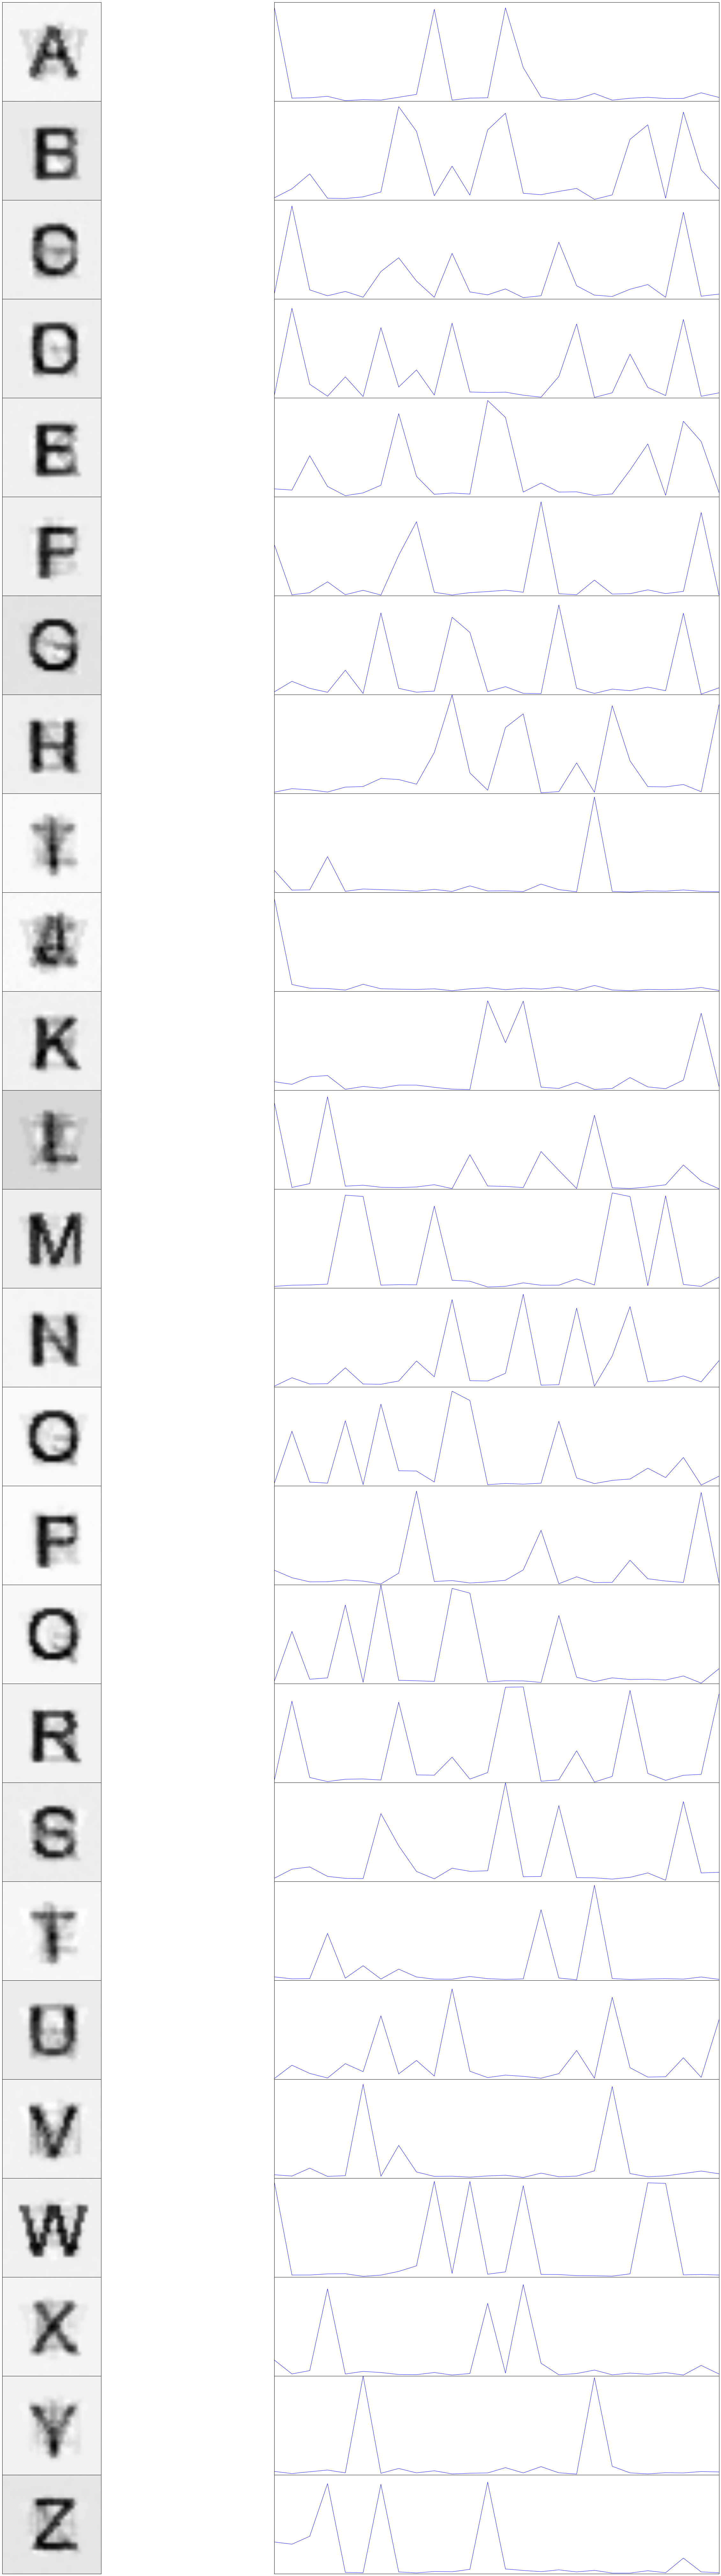

In [131]:
fig = plt.figure(figsize=(50, 150))

grid = gridspec.GridSpec(27, 3, wspace=0.0, hspace=0.0)

for char_num in range(26):

    char_idx = data_y == char_num
    img = np.mean(nn.feedforward(data_x[char_idx]), axis=0)
    
    activations = np.mean(nn.z[1], axis=0)
    
    ax = plt.Subplot(fig, grid[char_num*2])
    ax.imshow(img.reshape((29,29)), cmap="gray")
    ax.set_xticks([]);ax.set_yticks([])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, grid[char_num*2 + 1])
    ax.plot(activations.ravel())
    ax.set_xticks([]);ax.set_yticks([])
    fig.add_subplot(ax)

In [105]:
grid = gridspec.GridSpec(14, 2, wspace=0.0, hspace=0.0)

for char_num in range(26):
    print grid[]

In [107]:
grid[0]

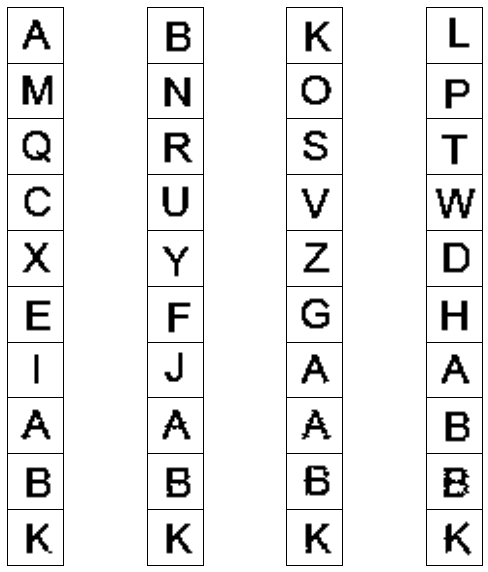

In [85]:

fig = plt.figure(figsize=(10, 10))

grid = gridspec.GridSpec(10, 4, wspace=0.0, hspace=0.0)
for i, s in enumerate(train_x[:40]):
    ax = plt.Subplot(fig, grid[i])
    
    ax.imshow(s.reshape((29,29)), cmap="gray")
    ax.set_xticks([]);ax.set_yticks([])
    fig.add_subplot(ax)

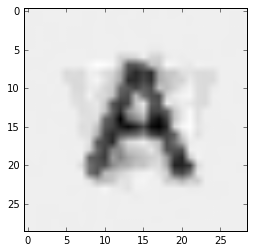

In [25]:
plt.imshow(nn.feedforward(s).reshape((29,29)), cmap="gray")

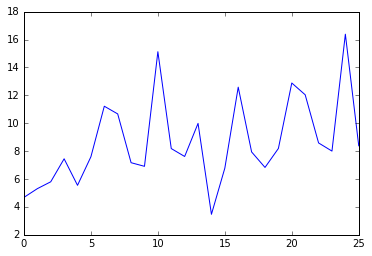

In [26]:
arr = np.zeros(nn.z[1].ravel().shape)
for o in test_x:
    nn.feedforward(o)
    arr += nn.z[1].ravel()

plt.plot(arr.ravel())